<a href="https://colab.research.google.com/github/SallyPeter/gomycodeDSbootcamp/blob/main/Python/Classwork_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instructions :**
### Data Cleaning:

1. Identify the columns containing missing values.
2. Apply a method to handle the missing values
3. Check for duplicates and remove if any.
4. Remove any irrelevant columns.

### Data Exploration:

1. Calculate summary statistics for numerical columns (mean, median, mode, etc).
2. Find the correlation between columns and create a heatmap.
3. Find the 3 most frequent countries that visitors tend to come from.
4. Determine the most common purpose of the visit by 'age_group'.
5. Analyse the data distribution of 'total_cost' column with respect to sevreal criteria : Country, age_group, purpose

*The data used in this work is the Historical data of Tanzania Tourism.csv*

*The metadata is in TanzaniaVariableDefinitions.csv*

In [1]:
# Importing necessary Libraries

import pandas as pd
import numpy as np



In [2]:
# Reading in the metadata

meta_data = pd.read_csv('TanzaniaVariableDefinitions.csv')

meta_data

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [3]:
data = pd.read_csv('Historical data of Tanzania Tourism.csv')
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [4]:
data.shape

(4809, 23)

In [5]:
data.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [6]:
cat_cols = data.select_dtypes(include='object')

cat_cols.describe()

,ID,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,payment_mode,first_trip_tz,most_impressing
count,4809,4809,4809,3695,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4496
unique,4809,105,4,5,7,9,8,2,2,2,2,2,2,2,2,4,2,7
top,tour_0,UNITED STATES OF AMERICA,25-44,Alone,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,Cash,Yes,Friendly People
freq,1,695,2487,1265,2840,2259,1913,2570,3357,2602,2748,2919,3319,3259,4079,4172,3243,1541


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [8]:
data.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,1114
total_female,3
total_male,5
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


## **Data Cleaning**

In [9]:
# Identify the columns containing missing values.

data.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,1114
total_female,3
total_male,5
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


The columns with missing values are 'travel_with', 'total_female', 'total_male' and 'most_impressing' with 'travel_with' having the most with over 1100 issing values


### To handle these

**total_female** -- *data type is float and the column has possible outliers as the max value is 49 and mean is 0.9. Hence, we would fill the missing values with the median value*

**total_male** -- *The data type is float and has possible outliers as in total_female above. Hence, the missing values would be filled with the median values.*

**most_impressing and travel_with** -- *As these are of data type object, they would be filled with the most occurring values ie the mode.*

In [10]:
# Apply a method to handle the missing values

data.total_female.fillna(data.total_female.median(), inplace = True)
data.total_male.fillna(data.total_male.median(), inplace = True)
data.most_impressing.fillna(data.most_impressing.mode()[0], inplace = True)
data.travel_with.fillna(data.travel_with.mode()[0], inplace = True)

In [11]:
data.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [12]:
# Check for duplicates and remove if any.
data.duplicated().sum()

0

In [13]:
# Remove any irrelevant columns.


## **Data Exploration**

In [14]:
# Calculate summary statistics for numerical columns (mean, median, mode, etc).
num_col = data.select_dtypes(include='number')

num_col.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926804,1.009565,8.488043,2.304429,8.114389e+06
std,1.287841,1.138273,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [15]:
num_col.mean().round(3)

,0
total_female,0.927
total_male,1.010
night_mainland,8.488
night_zanzibar,2.304
total_cost,8114388.778


In [16]:
num_col.median()

,0
total_female,1.0
total_male,1.0
night_mainland,6.0
night_zanzibar,0.0
total_cost,3397875.0


In [17]:
num_col.mode()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
0,1.0,1.0,0.0,0.0,1657500.0


<Axes: >

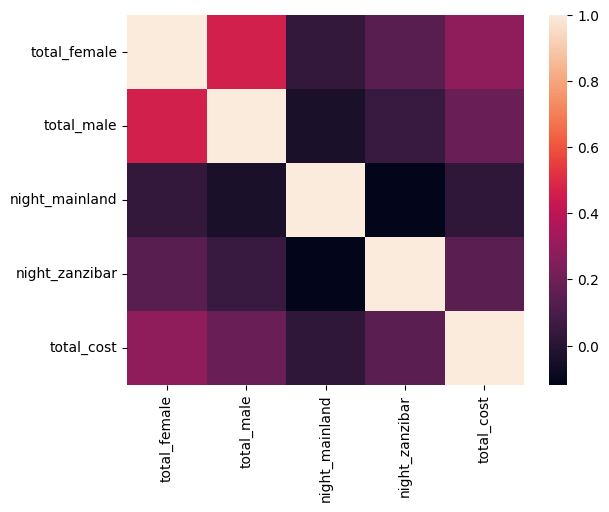

In [18]:
# Find the correlation between columns and create a heatmap.
import seaborn as sns

sns.heatmap(num_col.corr())


In [19]:
data.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [20]:
# Find the 3 most frequent countries that visitors tend to come from.
data.country.value_counts().sort_values(ascending=False)[:3]

,count
country,
UNITED STATES OF AMERICA,695
UNITED KINGDOM,533
ITALY,393


In [21]:
# Determine the most common purpose of the visit by 'age_group'.
data.groupby(['age_group', 'purpose'])['ID'].count().sort_values(ascending=False)

age_group  purpose                       
25-44      Leisure and Holidays              1324
45-64      Leisure and Holidays               915
25-44      Business                           474
1-24       Leisure and Holidays               349
25-44      Visiting Friends and Relatives     338
65+        Leisure and Holidays               252
25-44      Meetings and Conference            190
45-64      Visiting Friends and Relatives     171
           Business                           146
           Meetings and Conference            106
1-24       Visiting Friends and Relatives      96
25-44      Other                               87
1-24       Volunteering                        85
25-44      Volunteering                        39
1-24       Scientific and Academic             37
           Business                            36
25-44      Scientific and Academic             35
45-64      Other                               28
65+        Visiting Friends and Relatives      28
           Business                            15
45-64      Volunteering                        13
           Scientific and Academic             12
1-24       Other                               12
           Meetings and Conference              9
65+        Meetings and Conference              7
           Scientific and Academic              3
           Other                                1
           Volunteering                         1
Name: ID, dtype: int64

In [22]:
age_purpose = pd.DataFrame(data.groupby(['age_group', 'purpose'])['ID'].count()).reset_index()
age_purpose.sort_values(by= 'ID', ascending=False, inplace=True)

age_purpose.head(10)

,age_group,purpose,ID
8,25-44,Leisure and Holidays,1324
15,45-64,Leisure and Holidays,915
7,25-44,Business,474
1,1-24,Leisure and Holidays,349
12,25-44,Visiting Friends and Relatives,338
22,65+,Leisure and Holidays,252
9,25-44,Meetings and Conference,190
19,45-64,Visiting Friends and Relatives,171
14,45-64,Business,146
16,45-64,Meetings and Conference,106


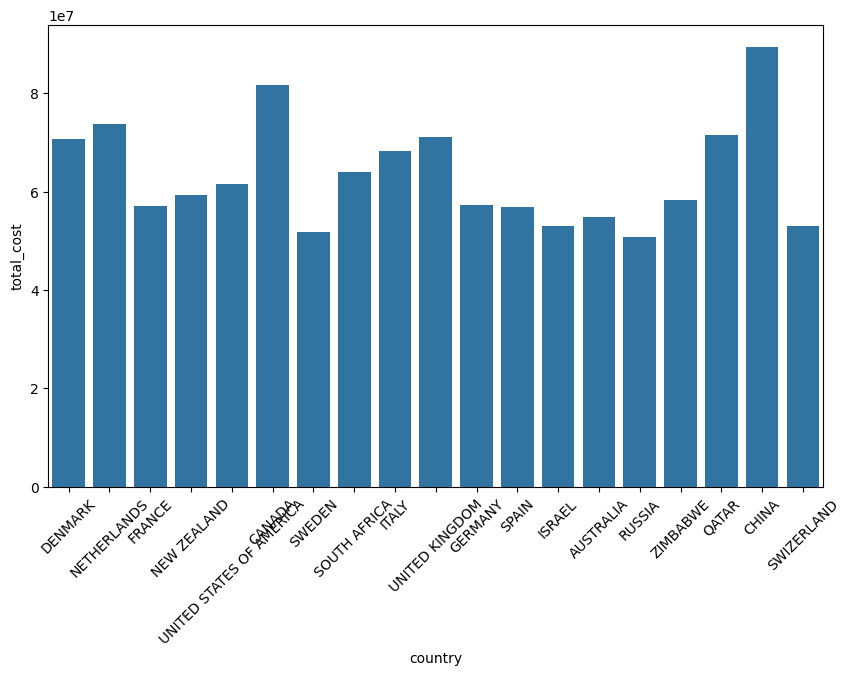

In [23]:
# Analyse the data distribution of 'total_cost' column with respect to sevreal criteria : Country, age_group, purpose

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data.loc[data['total_cost'] >= 50000000], x = 'country', y = 'total_cost', errorbar=None)
plt.xticks(rotation=45);

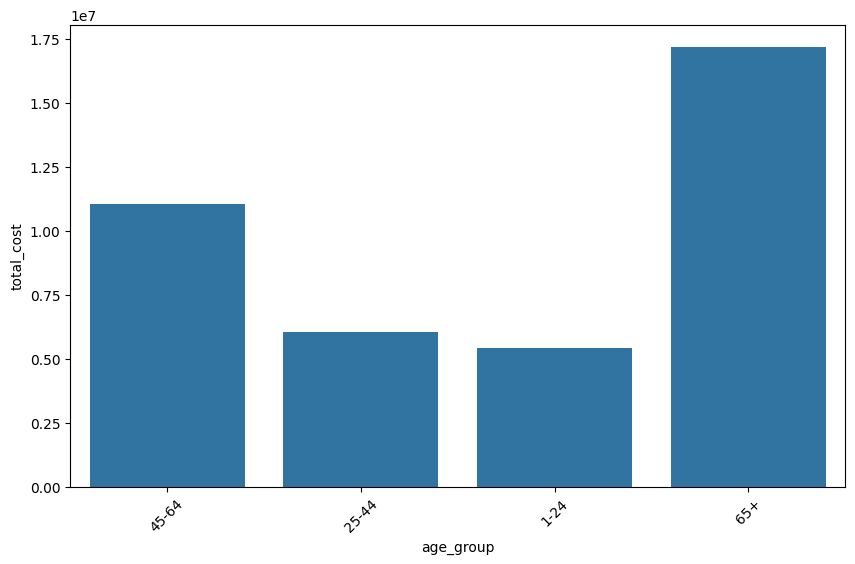

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(data, x = 'age_group', y = 'total_cost', errorbar=None)
plt.xticks(rotation=45);

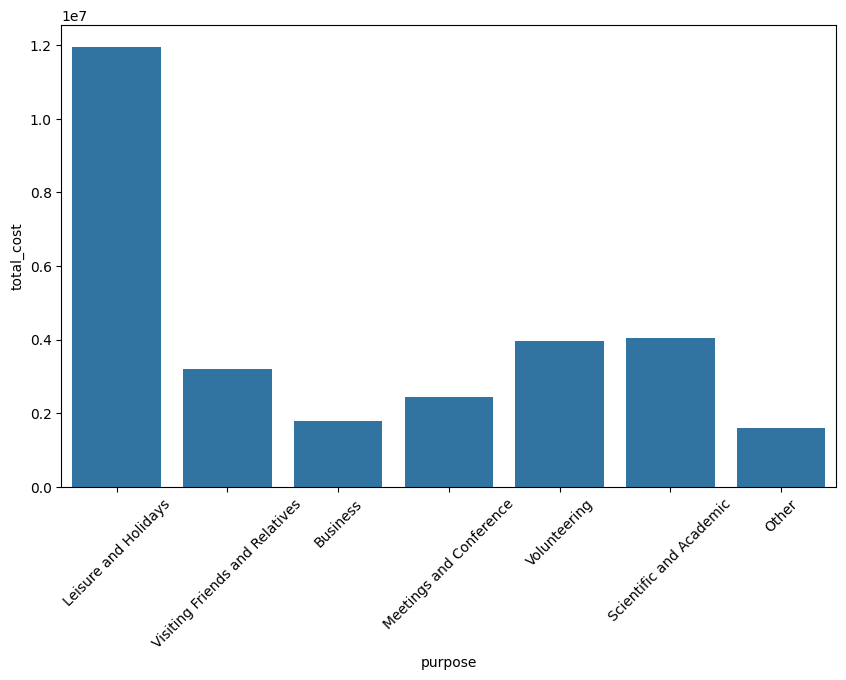

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data, x = 'purpose', y = 'total_cost', errorbar=None)
plt.xticks(rotation=45);

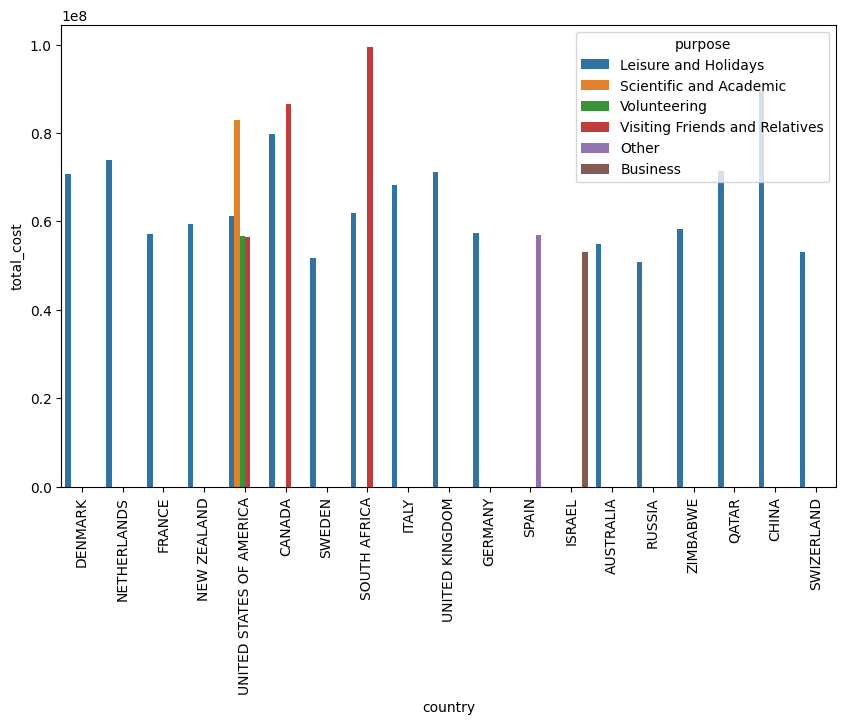

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data.loc[data['total_cost'] >= 50000000], x = 'country', y = 'total_cost', hue='purpose', errorbar=None)
plt.xticks(rotation=90);

In [27]:
# try these on one chart



In [33]:
data.loc[data['total_cost'] >= 50000000][['country', 'total_cost', 'purpose']]

,country,total_cost,purpose
96,DENMARK,50553750.0,Leisure and Holidays
236,NETHERLANDS,86190000.0,Leisure and Holidays
264,FRANCE,52194590.0,Leisure and Holidays
355,NEW ZEALAND,51548250.0,Leisure and Holidays
378,UNITED STATES OF AMERICA,56355000.0,Leisure and Holidays
...,...,...,...
4151,FRANCE,61410375.0,Leisure and Holidays
4330,UNITED STATES OF AMERICA,55526250.0,Leisure and Holidays
4370,GERMANY,52377000.0,Leisure and Holidays
4665,SWIZERLAND,53040000.0,Leisure and Holidays


In [34]:
filtered_data = data.loc[data['total_cost'] >= 50000000][['country', 'total_cost', 'purpose']]
pivot_data = filtered_data.pivot_table(index='country', columns='purpose', values='total_cost', aggfunc='sum')
pivot_data

purpose,Business,Leisure and Holidays,Other,Scientific and Academic,Visiting Friends and Relatives,Volunteering
country,,,,,,
AUSTRALIA,NaN,3.296602e+08,NaN,NaN,NaN,NaN
CANADA,NaN,3.992781e+08,NaN,NaN,172960125.0,NaN
CHINA,NaN,8.950500e+07,NaN,NaN,NaN,NaN
DENMARK,NaN,3.532961e+08,NaN,NaN,NaN,NaN
FRANCE,NaN,2.285287e+08,NaN,NaN,NaN,NaN
GERMANY,NaN,3.441995e+08,NaN,NaN,NaN,NaN
ISRAEL,53040000.0,NaN,NaN,NaN,NaN,NaN
ITALY,NaN,3.411008e+08,NaN,NaN,NaN,NaN
NETHERLANDS,NaN,2.214231e+08,NaN,NaN,NaN,NaN


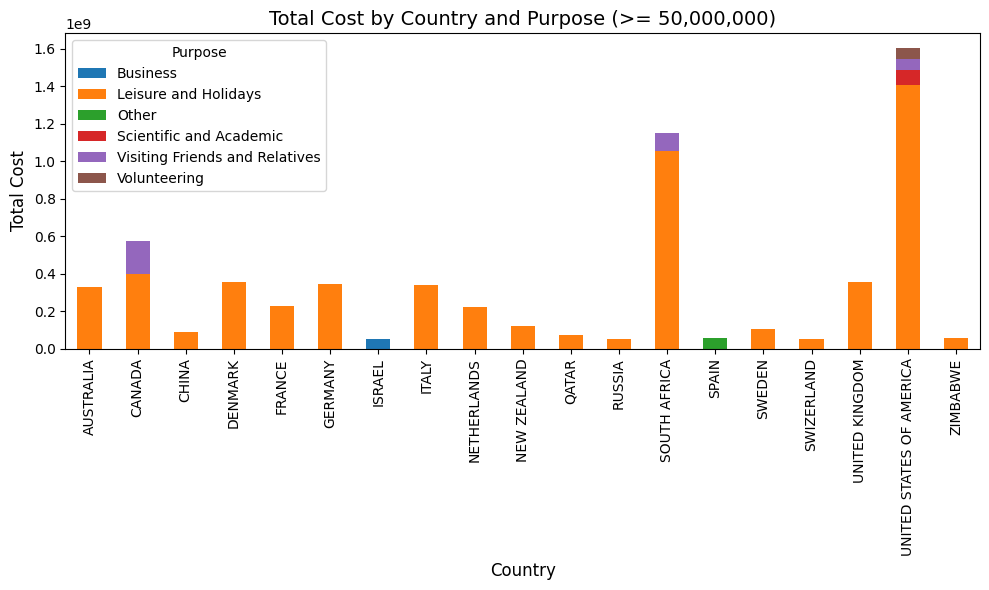

In [36]:
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Total Cost by Country and Purpose (>= 50,000,000)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Cost', fontsize=12)
plt.legend(title='Purpose')
plt.tight_layout()

# Show the plot
plt.show()

In [39]:
filtered_data = data.loc[data['total_cost'] >= 50000000][['country', 'age_group', 'total_cost', 'purpose']]

grouped_data = filtered_data.groupby(['country', 'age_group', 'purpose'])['total_cost'].agg(['mean', 'median', 'std', 'sum', 'count']).reset_index()
print("Grouped Data with Summary Statistics:\n", grouped_data)


Grouped Data with Summary Statistics:
                      country age_group                         purpose  \
0                  AUSTRALIA     45-64            Leisure and Holidays   
1                  AUSTRALIA       65+            Leisure and Holidays   
2                     CANADA      1-24            Leisure and Holidays   
3                     CANADA     25-44            Leisure and Holidays   
4                     CANADA     25-44  Visiting Friends and Relatives   
5                     CANADA     45-64            Leisure and Holidays   
6                     CANADA     45-64  Visiting Friends and Relatives   
7                      CHINA     25-44            Leisure and Holidays   
8                    DENMARK      1-24            Leisure and Holidays   
9                    DENMARK       65+            Leisure and Holidays   
10                    FRANCE     25-44            Leisure and Holidays   
11                    FRANCE     45-64            Leisure and Holidays   

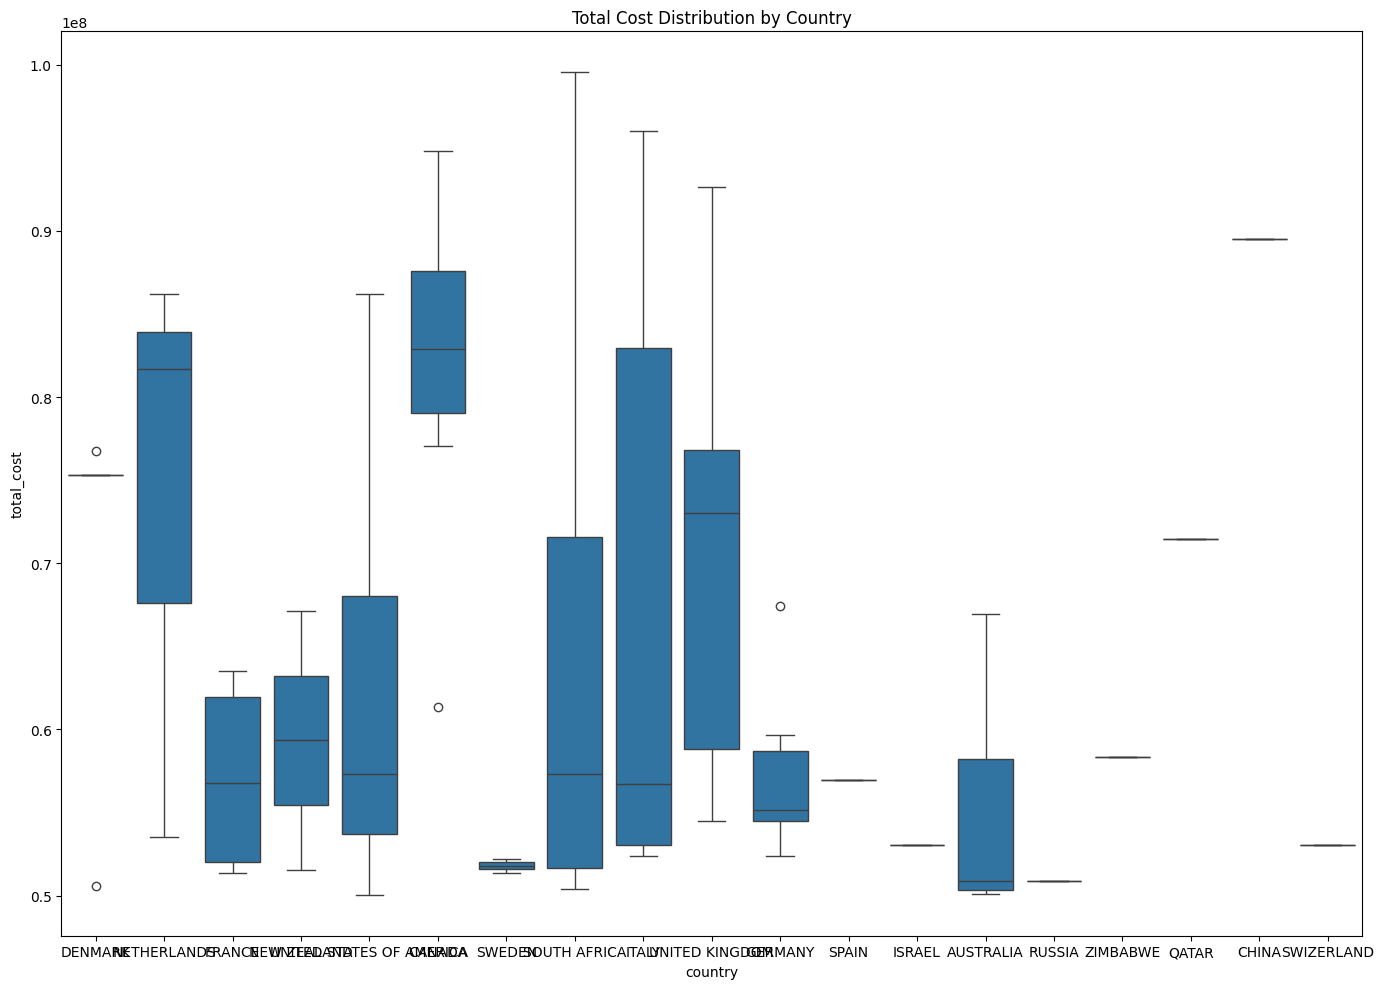

In [46]:

# Step 2: Visualize the distribution of total_cost with respect to Country, age_group, and purpose

# Boxplot for total_cost distribution by Country
plt.figure(figsize=(14,10 ))

# plt.subplot(1, 2, 1)
sns.boxplot(x='country', y='total_cost', data=filtered_data)
plt.title('Total Cost Distribution by Country')

plt.tight_layout()

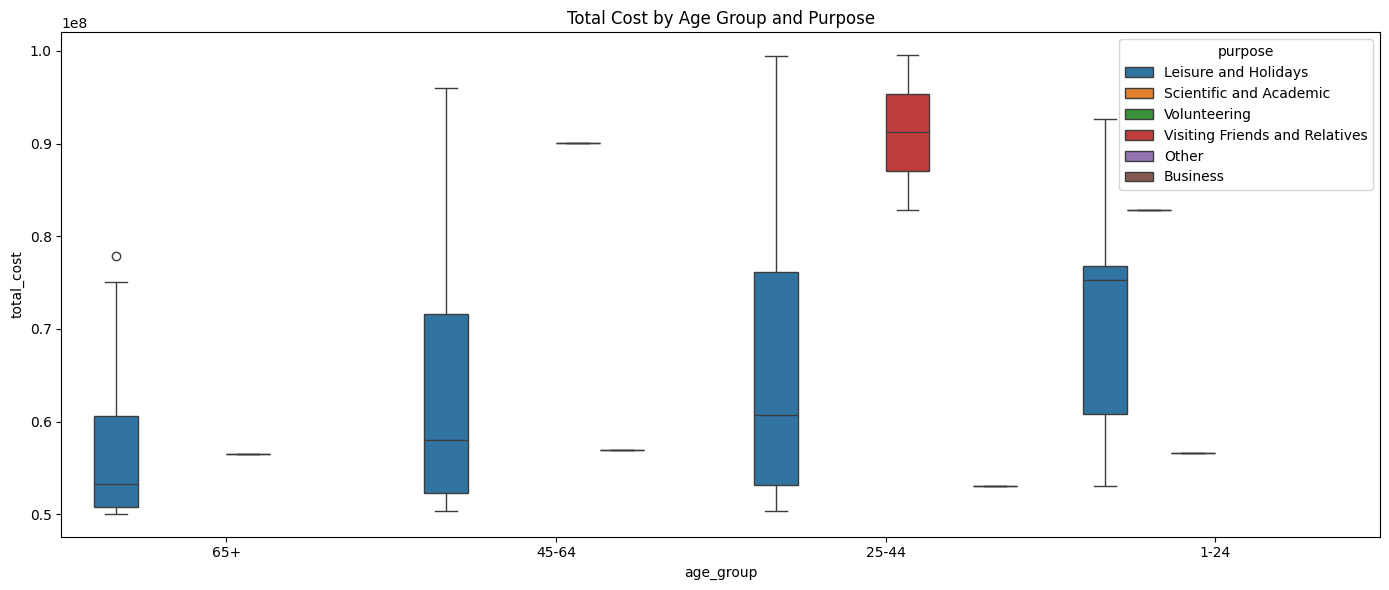

In [47]:
# Boxplot for total_cost distribution by Age Group and Purpose
# plt.subplot(1, 2, 2)
plt.figure(figsize=(14, 6))
sns.boxplot(x='age_group', y='total_cost', hue='purpose', data=filtered_data)
plt.title('Total Cost by Age Group and Purpose')

plt.tight_layout()


In [50]:
data.age_group.unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

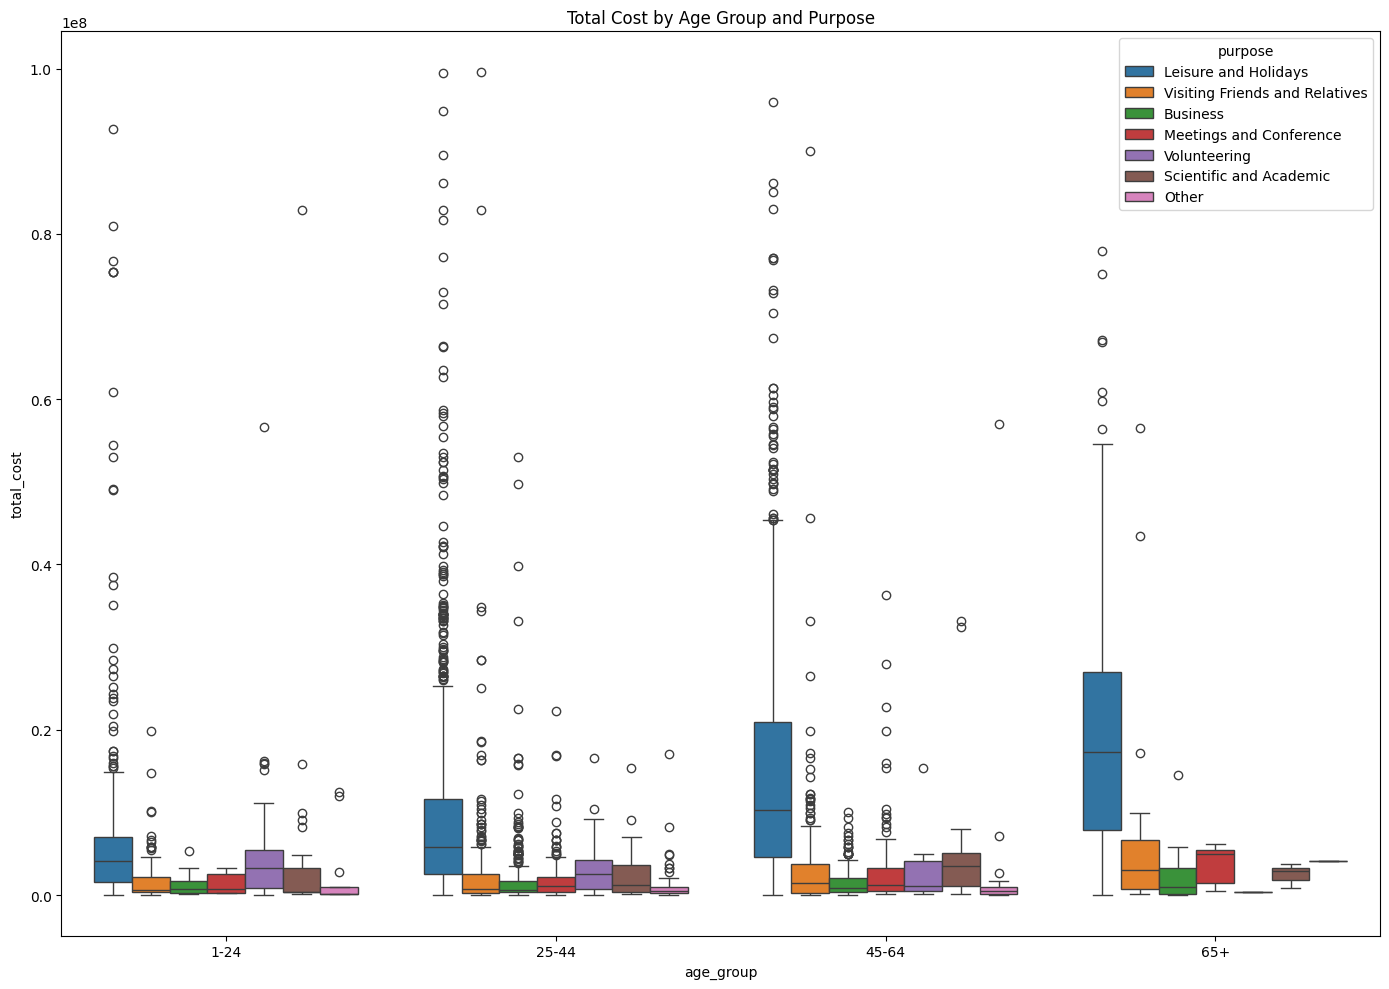

In [51]:
age_order = [ '1-24', '25-44', '45-64', '65+']

plt.figure(figsize=(14,10))
sns.boxplot(x='age_group', y='total_cost', hue='purpose', data=data, order= age_order)
plt.title('Total Cost by Age Group and Purpose')

plt.tight_layout()
